## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 7: Técnicas avanzadas para ciencia de datos y empleabilidad**

Hola, ya es el último proyecto, has avanzado y aprendido mucho hasta acá. ¡Muchas felicidades!

Es hora de poner en práctica todo lo que hemos aprendido a lo largo de nuestra travesía.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que lo concluyas de manera sobresaliente.

¡Éxito!

# Objetivos
- Aplicar con éxito todos los conocimientos que has adquirido a lo largo del Bootcamp.
- Consolidar las técnicas de limpieza, entrenamiento, graficación y ajuste a modelos de *Machine Learning*.
- Generar una API que brinde predicciones como resultado a partir de datos enviados.


# Proyecto

1. Selecciona uno de los siguientes *datasets*:
  - Imágenes de rayos X de pecho para detectar neumonía: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
  - *Reviews* de aplicaciones de la Google Play Store: https://www.kaggle.com/datasets/lava18/google-play-store-apps
  - Estadísticas demográficas de los ganadores del premio Oscar de la Academia: https://www.kaggle.com/datasets/fmejia21/demographics-of-academy-awards-oscars-winners
  - Aspiraciones profesionales de la generación Z: https://www.kaggle.com/datasets/kulturehire/understanding-career-aspirations-of-genz

Cada uno representa un *dataset*, un problema y una forma diferente de abordarlo. Tu tarea es identificar las técnicas y modelos que podrías usar para tu proyecto.

2. Debes hacer un análisis exploratorio y limpieza de los datos. Usa las ténicas que creas convenientes.

3. Entrena el modelo de *Machine Learning*, procesamiento de lenguaje natural o red neuronal que creas adecuado.

4. Genera por lo menos dos gráficas y dos métricas de rendimiento; explica las puntuaciones de rendimiento que amerite tu problema. Todas las gráficas de rendimiento que realices deben tener leyendas, colores y títulos personalizados por ti.

  - Además, antes de subir el modelo a "producción", deberás realizar un proceso de ensambles (*ensemblings*) y de ajuste de hiperparámetros o *tuning* para intentar mejorar la precisión y disminuir la varianza de tu modelo.

5. Construye una API REST en la que cualquier usuario pueda mandar datos y que esta misma devuelva la predicción del modelo que has hecho. La API debe estar en la nube, ya sea en un servicio como Netlify o Ngrok, para que pueda ser consultada desde internet.

6. Genera una presentación del problema y del modelo de solución que planteas. Muestra gráficas, datos de rendimiento y explicaciones. Esta presentación debe estar enfocada a personas que no sepan mucho de ciencia de datos e inteligencia artificial.

7. **Solamente se recibirán trabajos subidos a tu cuenta de GitHub con un README.md apropiado que explique tu proyecto**.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones | Punto parcial
| -- | -- | -- | -- |
| Actividad 1. Limpieza y EDA | 20 | Realiza todas las tareas necesarias para hacer el EDA y la limpieza correcta, dependiendo de la problemática. Debes hacer como mínimo el análisis de completitud, escalamiento (si aplica) y tokenización (si aplica). | Realizaste solo algunas tareas de exploración y limpieza y el modelo se muestra aún con oportunidad de completitud, escalamiento y/o mejora. |
| Actividad 2. Entrenamiento del modelo | 20 | Elige el modelo y algoritmo adecuados para tu problema, entrénalo con los datos ya limpios y genera algunas predicciones de prueba. | No has realizado predicciones de prueba para tu modelo de ML y/o tu modelo muestra una precisión menor al 60 %. |
| Actividad 3. Graficación y métricas | 20 | Genera por lo menos dos gráficas y dos muestras de métricas que permitan visualizar el rendimiento y precisión del modelo que construiste. Además, realizaste los procesos de *tuning* y ensambles adecuados para tu problema. | Las gráficas no tienen leyendas y colores customizados, solo muestras una gráfica o no realizaste el *tuning* de hiperparámetros.
| Actividad 4. API REST | 20 | Generaste con éxito un *link* público en el que, por método POST, se puede mandar información y la API REST devuelve una predicción junto con el porcentaje de confianza de esta misma. | N/A
| Actividad 5. Presentación | 20 | Genera una presentación en la que establezcas como mínimo: el problema, proceso de solución, metodologías usadas, gráficas de rendimiento, demostración del modelo y aprendizajes obtenidos. Debes redactarla con términos que pueda entender cualquier persona, no solo científicos de datos. | La presentación no expone con claridad o en términos coloquiales el proceso de creación del modelo, sus ventajas y muestras de rendimiento.

**Mucho éxito en tu camino como Data Scientist.**

# Librerías

## Cargar Librerías

## Importar Librerías

In [1]:
# ==============================================================================
# BÁSICAS Y MANIPULACIÓN DE DATOS
# ==============================================================================
import pandas   as pd
import numpy    as np
import os
import shutil
import glob
import warnings
from itertools import cycle

# ==============================================================================
# VISUALIZACIÓN
# ==============================================================================
import matplotlib.pyplot    as plt
import matplotlib.image     as mpimg
import seaborn              as sns
from PIL                    import Image
import cv2
from tqdm                   import tqdm # Para una barra de progreso útil

# ==============================================================================
# DEEP LEARNING - TENSORFLOW Y KERAS
# ==============================================================================
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.preprocessing.image       import ImageDataGenerator
from tensorflow.keras.models                    import Sequential, Model , load_model
from tensorflow.keras.layers                    import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D)
from tensorflow.keras.applications              import VGG16, EfficientNetB0 
from tensorflow.keras.optimizers                import Adam
from tensorflow.keras.callbacks                 import EarlyStopping, ReduceLROnPlateau


# ==============================================================================
# UTILIDADES DE MACHINE LEARNING - SCIKIT-LEARN
# ==============================================================================
from sklearn.model_selection                    import train_test_split
from sklearn.utils                              import class_weight
from sklearn.metrics                            import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing                      import LabelBinarizer


# ==============================================================================
# DESPLIEGUE DE MODELOS - FLASK
# ==============================================================================
from flask                                      import Flask, request, jsonify
from tensorflow.keras.preprocessing             import image
import io


# Cargar Data Set

Para este proyecto se ha escogido el Data Set de Imágenes de rayos X de pecho para detectar neumonía. Se ha descargado el Data Set desde Kaggle y se ha almacenado de forma local. Debido a que el data set está estructurado en carpetas, según los conjuntos de entrenamiento, prueba y validación, se definirán las rutas utilizando `os`.

https://www.kaggle.com/code/murtadhanajim/x-ray-chest-different-models-with-86

In [2]:
# Rutas del dataset
base_dir = '/Users/gabrielgonzalez/Documents/Ciencia de Datos/M7 Técnicas Avanzadas/'
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
val_dir = os.path.join(base_dir, "val")

# Análisis Exploratorio de Datos (EDA)

## Distribución de Clases por Conjunto

Como en este caso el data set corresponde a un directorio de imágenes, crearemos una función para contar las imagenes por clase. Según el diccionario de datos de Kaggle, existen 3 tipos de imágenes: 

* Normal
* Neumonía Viral
* Neumonía Bacteriana

Procedemos a contabilizar cada una de las 3 clases y su distribución en los conjuntos suministrados.

In [3]:
def contar_imagenes(directorio):
    # Inicializar el diccionario de conteo para las 3 clases
    conteo = {'Normal': 0, 'Bacterial': 0, 'Viral': 0}

    # Definir rutas a las subcarpetas
    normal_path = os.path.join(directorio, 'NORMAL')
    pneumonia_path = os.path.join(directorio, 'PNEUMONIA')

    # Contar imágenes en la carpeta NORMAL
    if os.path.exists(normal_path):
        # Filtramos para evitar archivos ocultos como .DS_Store
        conteo['Normal'] = len([f for f in os.listdir(normal_path) if f.endswith('.jpeg')])

    # Contar imágenes en la carpeta PNEUMONIA, diferenciando por nombre
    if os.path.exists(pneumonia_path):
        for filename in os.listdir(pneumonia_path):
            if 'bacteria' in filename.lower():
                conteo['Bacterial'] += 1
            elif 'virus' in filename.lower():
                conteo['Viral'] += 1
                
    return conteo

Aplicamos la función `contar_imagenes` sobre las subcarpetas del data set y graficamos su estructura y composición.

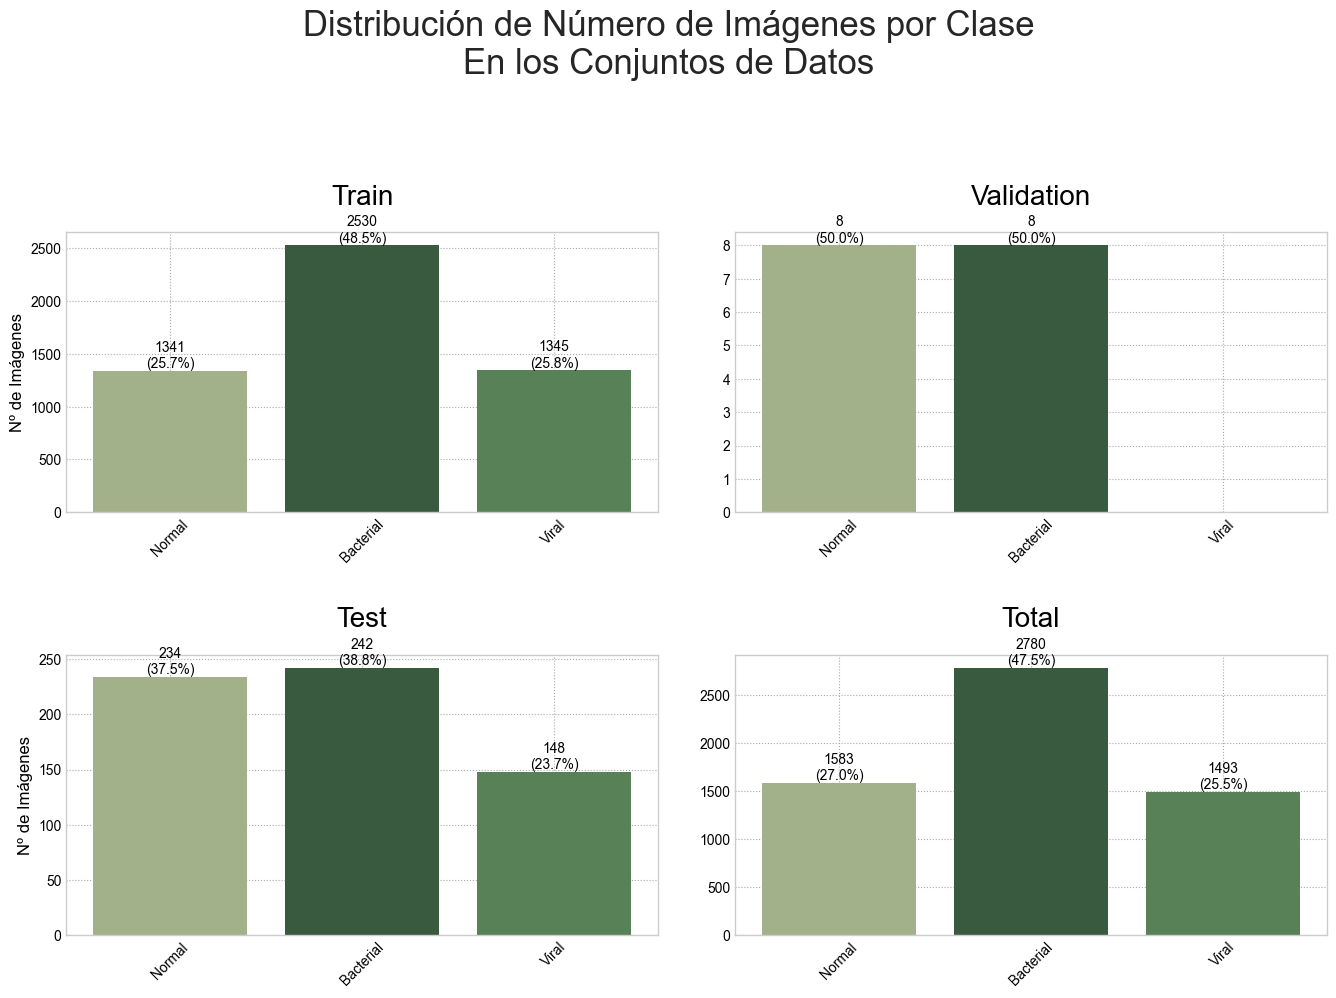

In [4]:
# Contamos las imágenes en cada conjunto
train_counts = contar_imagenes(train_dir)
test_counts = contar_imagenes(test_dir)
val_counts = contar_imagenes(val_dir)

# Calculamos el total sumando los conteos de cada conjunto
total_counts = {
    'Normal': train_counts['Normal'] + test_counts['Normal'] + val_counts['Normal'],
    'Bacterial': train_counts['Bacterial'] + test_counts['Bacterial'] + val_counts['Bacterial'],
    'Viral': train_counts['Viral'] + test_counts['Viral'] + val_counts['Viral']
}

# Lista de datos y títulos para iterar y crear los gráficos
datasets = [
    ('Train', train_counts),
    ('Validation', val_counts),
    ('Test', test_counts),
    ('Total', total_counts)
]

# Gráfico
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Colores
color_map = {
    'Normal': '#A3B18A',
    'Bacterial': '#3A5A40',
    'Viral': '#588157'
}

# Subgráficos
for ax, (title, data) in zip(axes.flatten(), datasets):
    labels = list(data.keys())
    counts = list(data.values())
    colors = [color_map.get(label, '#808080') for label in labels]
    
    # Barras
    bars = ax.bar(labels, counts, color=colors)
    
    # Ajustes de estilo para cada subgráfico
    ax.set_facecolor('white')
    ax.grid(True, which='major', linestyle=':', linewidth='0.8', color='darkgray')
    
    # Títulos y etiquetas
    ax.set_title(title, fontsize=20, pad=20, color='black')
    ax.tick_params(axis='x', rotation=45, colors='black')
    ax.tick_params(axis='y', colors='black')
    
    # Calculo de subtotal para los porcentajes
    subtotal = sum(counts)
    
    # Añadimos etiquetas de valor y porcentaje encima de cada barra
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            percentage = 100 * height / subtotal
            label_text = f'{height}\n({percentage:.1f}%)'
            ax.text(bar.get_x() + bar.get_width() / 2, height, label_text,
                    ha='center', va='bottom', fontsize=10, color='black')

# Etiquetas de los ejes Y
axes[0, 0].set_ylabel('Nº de Imágenes', fontsize=12, color='black')
axes[1, 0].set_ylabel('Nº de Imágenes', fontsize=12, color='black')

# Título general
fig.suptitle('Distribución de Número de Imágenes por Clase\nEn los Conjuntos de Datos', fontsize=25, y=1.02)
plt.tight_layout(pad=3.0)
plt.show()

Este análisis nos permite obtener información valiosa de este data set: 

* Desbalance entre clases: No existe un balance equitativo entre las 3 clases en ninguno de los subconjuntos de datos, ni tampoco en el total del data set. Esto creará un problema de sesgo en el entrenamiento del modelo. Tomaremos esto en consideración para redistribuir los datos manteniendo el mismo balance entre clases en todos los subconjuntos. 

* Tamaño del conjunto de validación: El conjunto de validación sólo contiene 16 imágenes, el cuál es un porcentaje bajo del total del data set. Cuantificaremos la distribución del tamaño de cada subconjunto de datos en el siguiente apartado.

* Composición del conjunto de validación: El conjunto de validación no contiene imágenes de la clase `viral`. 

## Distribución de Conjuntos en el Data Set

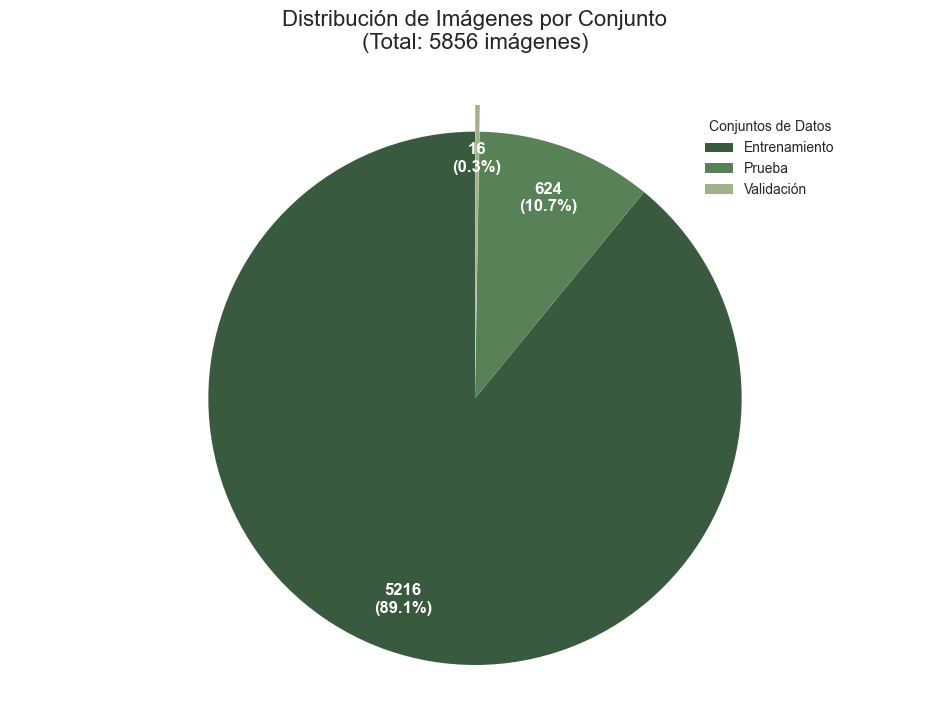

In [5]:
# Contamos el total de imágenes en cada conjunto
total_train = sum(train_counts.values())
total_test = sum(test_counts.values())
total_val = sum(val_counts.values())

# Nombramos los conjuntos y preparamos los datos para el gráfico
labels = ['Entrenamiento', 'Prueba', 'Validación']
sizes = [total_train, total_test, total_val]
total_imagenes = sum(sizes)

colors = ['#3A5A40', '#588157', '#A3B18A']
explode = (0, 0, 0.1) 

# Gráfico
plt.figure(figsize=(12, 8))
plt.pie(
    sizes,
    explode=explode,
    colors=colors,
    autopct=lambda p: f'{round(p*total_imagenes/100)}\n({p:.1f}%)',
    startangle=90,
    pctdistance=0.8,
    textprops={'fontsize': 12, 'color': 'white', 'fontweight': 'bold'}
)

# Título del gráfico
plt.title(f'Distribución de Imágenes por Conjunto\n(Total: {total_imagenes} imágenes)', fontsize=16, pad=20)

# Leyenda
plt.legend(labels, title="Conjuntos de Datos", loc="best", bbox_to_anchor=(0.9, 0.95))

plt.axis('equal') 
plt.show()

Notamos que la distribución de conjuntos en el data set es aproximadamente de 90% Entrenamiento y 10% Prueba, siendo menos del 1% el conjunto de Validación. Tomaremos esta información en consideración para reordenar los conjuntos de entrenamiento, validación y pruebas, dejando al menos un 20% para pruebas en los siguientes apartados de este proyecto.

A continuación definiremos la función `crear_data_frame`para generar data frames con las rutas de los archivos (`filepath`) y sus etiquetas (`label`), a fin de poder manejar de manera más simple la información.

In [6]:
def crear_data_frame(base_dir):
    data = []
    
    for category in ['NORMAL', 'PNEUMONIA']:
        path = os.path.join(base_dir, category)
        for filename in os.listdir(path):
            filepath = os.path.join(path, filename)
            
            # Asignamos la etiqueta correcta
            if category == 'NORMAL':
                label = 'Normal'
            elif 'virus' in filename.lower():
                label = 'Viral'
            elif 'bacteria' in filename.lower():
                label = 'Bacterial'
            else:
                continue # Ignorar si no es un archivo de imagen válido
            
            data.append({'filepath': filepath, 'label': label})
            
    return pd.DataFrame(data)



Creamos los data frame para cada conjunto

In [7]:
train_df = crear_data_frame(train_dir)
test_df = crear_data_frame(test_dir)
val_df = crear_data_frame(val_dir)


Consolidamos todos los datos en un solo data frame

In [8]:
full_df = pd.concat([train_df, test_df, val_df], ignore_index=True)

Visualizamos las 5 primeras filas del data frame

In [9]:
full_df.head()

,filepath,label
0,/Users/gabrielgonzalez/Documents/Ciencia de Da...,Normal
1,/Users/gabrielgonzalez/Documents/Ciencia de Da...,Normal
2,/Users/gabrielgonzalez/Documents/Ciencia de Da...,Normal
3,/Users/gabrielgonzalez/Documents/Ciencia de Da...,Normal
4,/Users/gabrielgonzalez/Documents/Ciencia de Da...,Normal


Visualizamos la información principal del data frame con `.info()`

In [10]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filepath  5856 non-null   object
 1   label     5856 non-null   object
dtypes: object(2)
memory usage: 91.6+ KB


Corroboramos que la distribución por clase coincida con lo contabilizado en los gráficos de barra

In [11]:
round(full_df['label'].value_counts(normalize=True) * 100,1)

label
Bacterial    47.5
Normal       27.0
Viral        25.5
Name: proportion, dtype: float64

## Análisis Univariable

Definiremos una función para visualizar imágenes del data set por clase

In [12]:
def mostrar_muestras_por_clase(df, clase, n_muestras=3, random_state=42):
    """
    Muestra un número determinado de imágenes aleatorias para una clase específica.

    Parámetros:
    -----------
    df : pd.DataFrame
        El DataFrame que contiene las columnas 'filepath' y 'label'.
    clase : str
        El nombre de la clase a visualizar (ej. 'Normal', 'Bacterial', 'Viral').
    n_muestras : int, opcional
        El número de imágenes de muestra a mostrar. Por defecto es 3.
    random_state : int, opcional
        Una semilla para la selección aleatoria para resultados reproducibles.
    """
    # Filtramos el DataFrame para la clase especificada
    df_clase = df[df['label'] == clase]
    
    # Verificamos si hay suficientes muestras
    if len(df_clase) < n_muestras:
        print(f"Error: No hay suficientes muestras para la clase '{clase}'. Se encontraron {len(df_clase)}.")
        return
        
    # Tomamos una muestra aleatoria
    muestras_aleatorias = df_clase.sample(n_muestras, random_state=random_state)

    # Creamos la visualización
    fig, axes = plt.subplots(1, n_muestras, figsize=(5 * n_muestras, 5))
    fig.suptitle(f'Muestras Aleatorias de la Clase: {clase}', fontsize=16, y=1.0)

    for ax, filepath in zip(axes, muestras_aleatorias['filepath']):
        try:
            img = mpimg.imread(filepath)
            ax.imshow(img, cmap='gray')
        except FileNotFoundError:
            ax.text(0.5, 0.5, 'Imagen no encontrada', ha='center', va='center')
        
        ax.axis('off')

    plt.tight_layout()
    plt.show()

### Normal

Visualizamos 3 imágenes de la clase `normal`

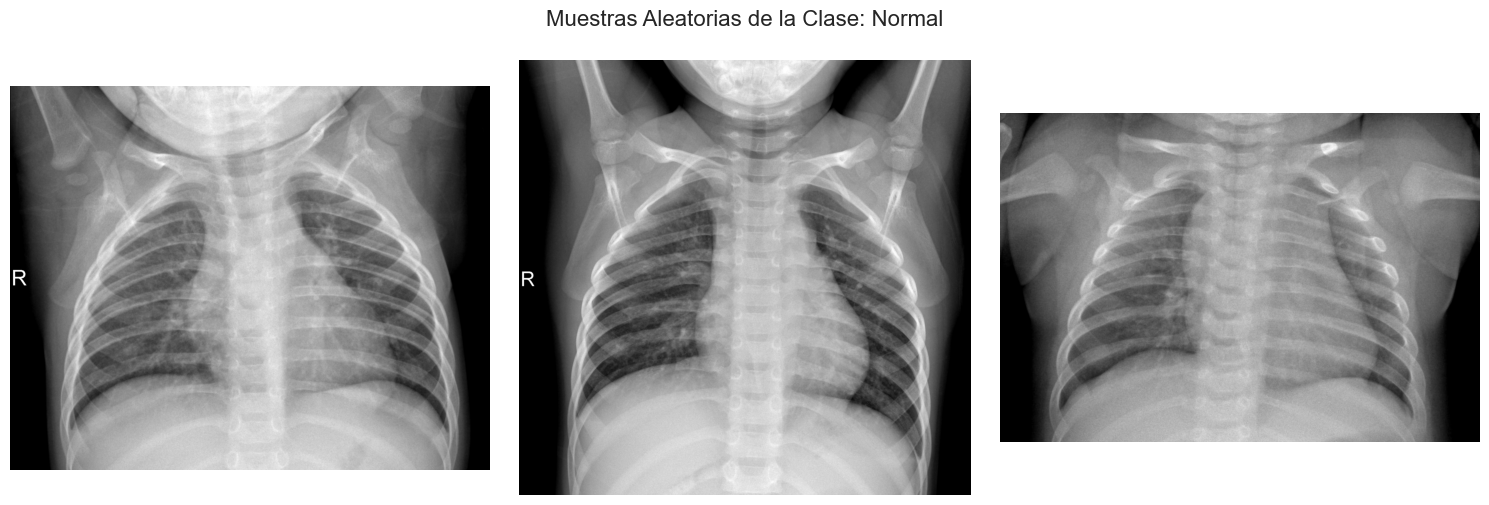

In [13]:
mostrar_muestras_por_clase(full_df, 'Normal')

Se observan imágenes acorde a lo que describe el diccionario de datos: radiografías de tórax de pacientes pediátricos sanos.

### Viral

Analizamos una muestra aleatoria de la clase `viral`

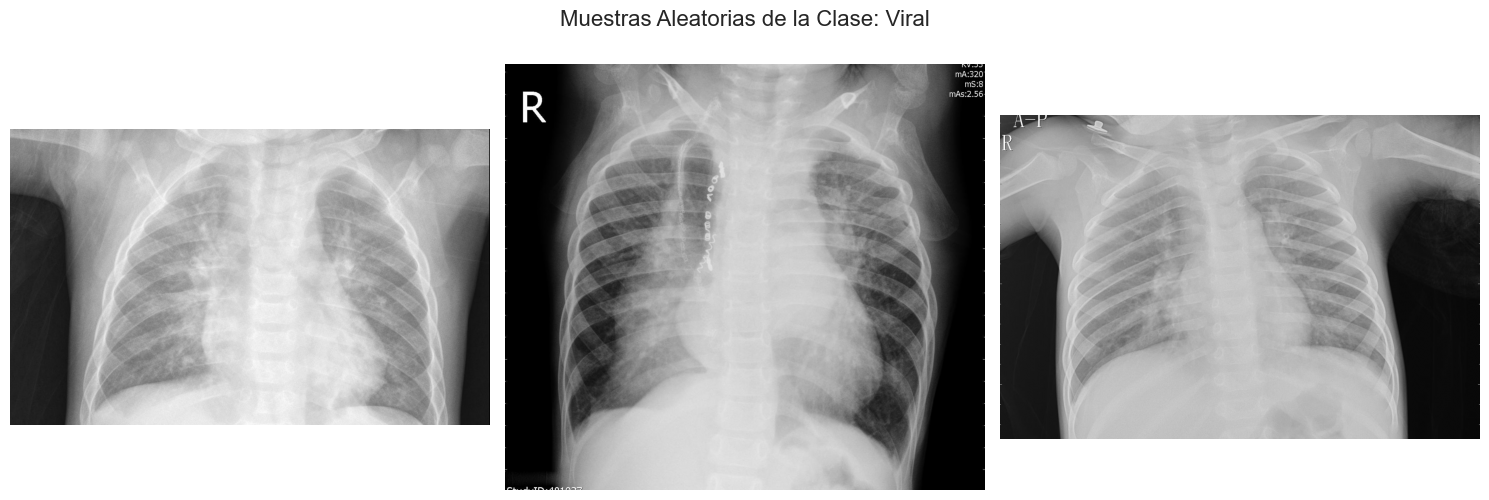

In [14]:
mostrar_muestras_por_clase(full_df, 'Viral')

Observamos que las imágenes muestran áreas más blanquecinas en el tórax, correspondientes a sectores inflamados (Fuente: https://www.mayoclinic.org/es/diseases-conditions/pneumonia/multimedia/chest-x-ray-showing-pneumonia/img-20005827).

### Bacterial

Finalmente, analizamos una muestra aleatoria de la clase `Bacterial`

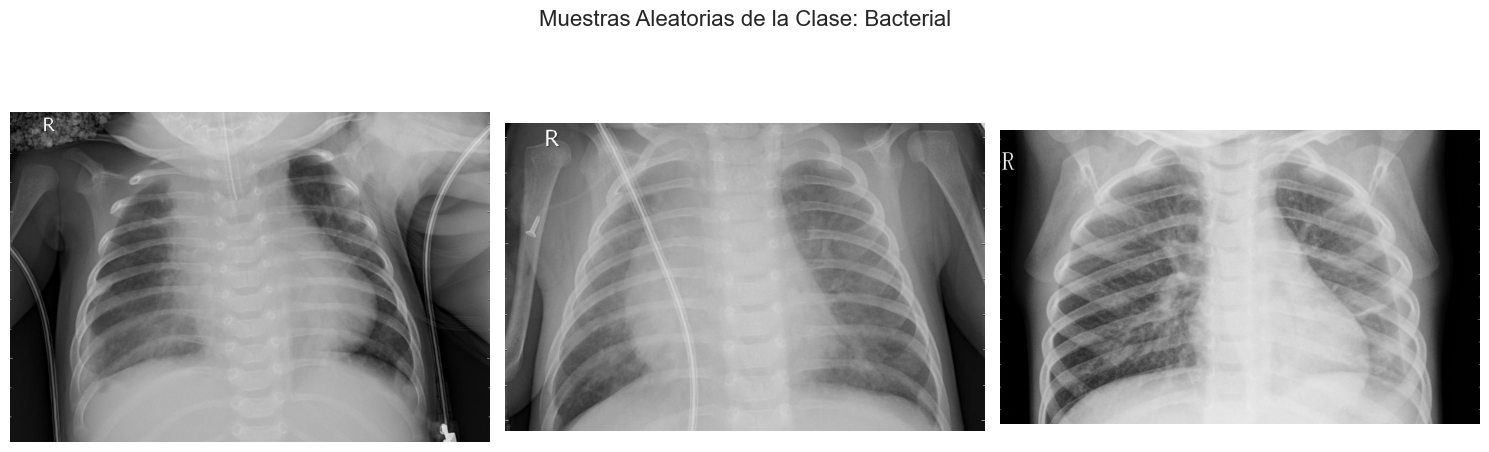

In [15]:
mostrar_muestras_por_clase(full_df, 'Bacterial')

Observamos que, similar a la neumonía por causas virales, la neumonía por causas bacteriales también muestra patrones de inflamación en las zona toráxica. Podemos notar también que la diferencias radiológicas entre ambas clases de neumonía es sutil, ya que las neumonías virales presentan infamación homogénea en los pulmones, a diferencia de las de origen bacterial, las cuales presentan inflamaciones más focalizadas, el desafío para la confección del modelo será construir una estructura de red neuronal convolucional que sea capaz de detectar las sutiles diferencias en el patrón de la inflamación.

### Imagen promedio por clase

Generamos una "imagen promedio" de cada clase, para entender características generales que pudieran distinguir las clases.

Calculando imagen promedio para la clase: Normal...


Procesando Normal: 100%|██████████| 1341/1341 [00:10<00:00, 123.57it/s]


Calculando imagen promedio para la clase: Bacterial...


Procesando Bacterial: 100%|██████████| 2530/2530 [00:05<00:00, 478.24it/s]


Calculando imagen promedio para la clase: Viral...


Procesando Viral: 100%|██████████| 1345/1345 [00:03<00:00, 420.02it/s]


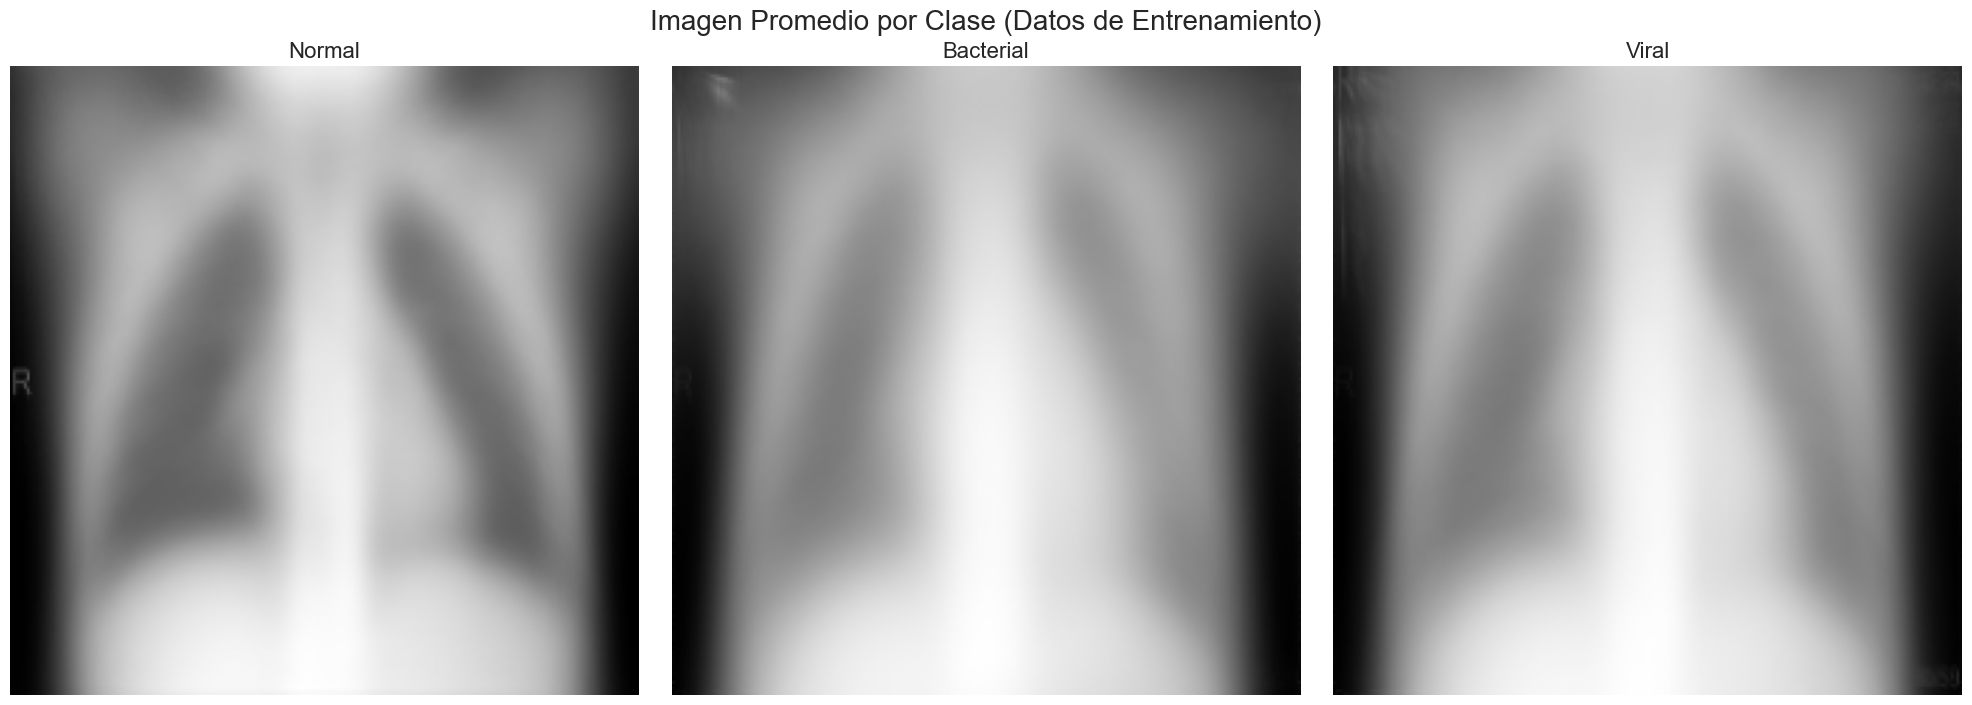

In [16]:
# Definimos el tamaño al que redimensionaremos las imágenes
IMG_SIZE = (224, 224)
clases = ['Normal', 'Bacterial', 'Viral']

# Configuramos la figura para las imágenes promedio
fig, axes = plt.subplots(1, len(clases), figsize=(20, 7))
fig.suptitle('Imagen Promedio por Clase (Datos de Entrenamiento)', fontsize=20, y=1.0)

for i, clase in enumerate(clases):
    print(f"Calculando imagen promedio para la clase: {clase}...")
    
    filepaths = train_df[train_df['label'] == clase]['filepath'].tolist()
    
    image_sum = np.zeros((IMG_SIZE[0], IMG_SIZE[1]), np.float64)
    
    for filepath in tqdm(filepaths, desc=f'Procesando {clase}'):
        try:
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            img_resized = cv2.resize(img, IMG_SIZE)
            image_sum += img_resized
        except Exception as e:
            print(f"No se pudo procesar {filepath}: {e}")
            continue

    average_image = image_sum / len(filepaths)
    average_image = cv2.normalize(average_image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

    ax = axes[i]
    ax.imshow(average_image, cmap='gray')
    ax.set_title(clase, fontsize=16)
    ax.axis('off')

# Mostrar la figura completa
plt.tight_layout()
plt.show()

Observamos que la clase `Normal`presenta una zona oscura clara en el área de los pulmones y las clases `Bacterial` y `Viral`presentan dicha zona de forma menos definida con respecto a la normal. En este caso, la diferencia entre las dos últimas es difícil de realizar, ya que son visualmente muy similares. Podemos notar que la clase `Bacterial`es ligeramente más "borrosa" que `Viral`, lo que puede ser a raíz de que los patrones de inflamación estén más diseminados, como sugiere la bibliografía.

## Conclusiones EDA

Podemos concluir que: 

* Existe un desbalance severo entre las diferentes clases del data set
* El tamaño del conjunto de pruebas y validación no es el adecuado con respecto a los estándares de ciencia de datos y requiere re organizar los conjuntos. 
* La principal diferencia entre las imágenes de las distintas clases radica en los patrones de inflamación de la zona de los pulmones, la cual se visualiza como distintas distribuciones de las áreas blanquecinas de las imágenes.

# Preprocesamiento

Como observamos en el EDA, es necesario reorganizar los conjuntos de entrenamiento, validación y prueba, lo que haremos a continuación:

## Conjuntos de Entrenamiento y Prueba

In [17]:
# Dividimos el DataFrame en 80% para entrenamiento y 20% para prueba
train_df_2, test_df_2 = train_test_split(
    full_df,
    test_size=0.20,             # 20% de los datos para el conjunto de prueba final
    random_state=42,            # Para resultados reproducibles
    stratify=full_df['label']   # Mantiene el balance de clases.
)

Graficamos la composición por clase para cada conjunto de datos

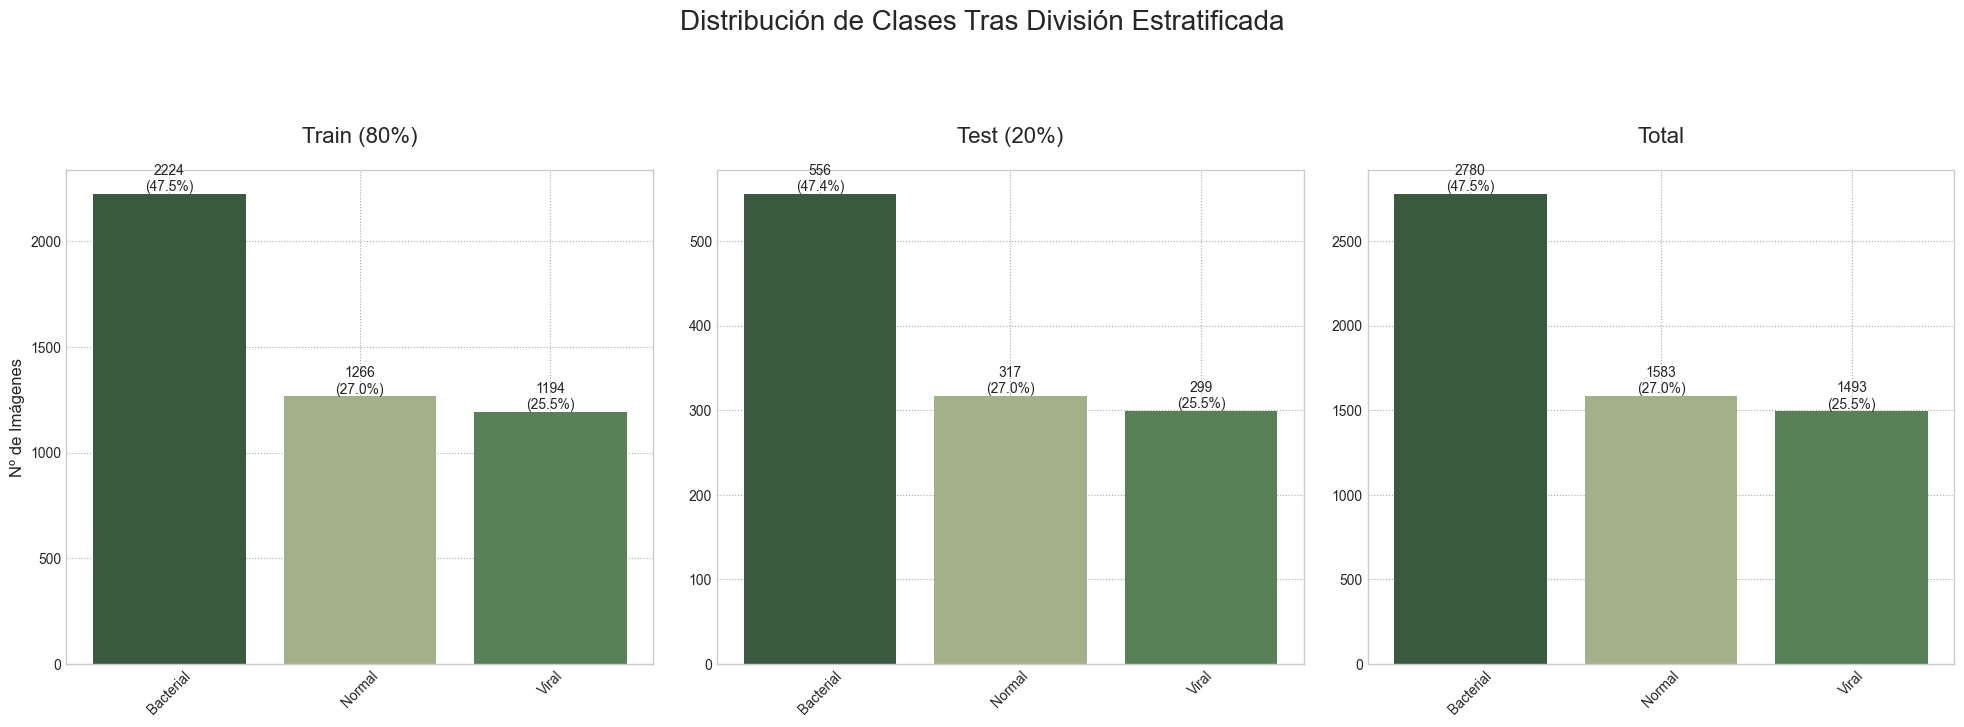

In [18]:
# Usamos .value_counts() para contar las clases en cada DataFrame y lo convertimos en un diccionario
train_counts = train_df_2['label'].value_counts().to_dict()
test_counts = test_df_2['label'].value_counts().to_dict()
total_counts = full_df['label'].value_counts().to_dict()

# Lista de datos y títulos para los nuevos subgráficos
datasets = [
    ('Train (80%)', train_counts),
    ('Test (20%)', test_counts),
    ('Total', total_counts)
]

# Gráfico
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Colores
color_map = {
    'Normal': '#A3B18A',
    'Bacterial': '#3A5A40',
    'Viral': '#588157'
}

# Subgráficos
for ax, (title, data) in zip(axes, datasets):
    labels = sorted(data.keys()) # Ordenamos las claves para consistencia
    counts = [data[key] for key in labels]
    colors = [color_map.get(label, '#808080') for label in labels]
    
    bars = ax.bar(labels, counts, color=colors)
    
    ax.set_facecolor('white')
    ax.grid(True, which='major', linestyle=':', linewidth='0.8', color='darkgray')
    ax.set_title(title, fontsize=16, pad=20)
    ax.tick_params(axis='x', rotation=45)
    
    subtotal = sum(counts)
    
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            percentage = 100 * height / subtotal
            label_text = f'{height}\n({percentage:.1f}%)'
            ax.text(bar.get_x() + bar.get_width() / 2, height, label_text,
                    ha='center', va='bottom', fontsize=10)

# Etiqueta del eje Y 
axes[0].set_ylabel('Nº de Imágenes', fontsize=12)

# Título general
fig.suptitle('Distribución de Clases Tras División Estratificada', fontsize=20, y=1.05)
plt.tight_layout(pad=2.0)
plt.show()

Notamos que ahora la proporción entre clases se mantiene de manera uniforme en los 3 conjuntos.

# Modelado y Entrenamiento

Se ha seleccionado una arquitectura de Red Neuronal Convolucional (CNN) secuencial como modelo base, dado que es el estándar de la industria para tareas de clasificación de imágenes. Esta arquitectura, con su estructura de bloques apilados de Conv2D y MaxPooling2D, está diseñada para aprender características visuales de forma jerárquica: las primeras capas capturan patrones simples (bordes, texturas) y las más profundas detectan formas más complejas. La capa Dropout se incluye estratégicamente para la regularización y para prevenir el sobreajuste, mientras que la capa de salida Dense con 3 neuronas y activación softmax es esencial para adaptar el modelo a nuestro problema específico de clasificación multiclase (Normal, Bacterial, Viral).

A continuación, definiremos los hiperparámetros del modelo en un diccionario para tener un flujo de trabajo modular sobre el código.

In [19]:
# Hiperparámetros del modelo
HP = {
    "IMG_SIZE": 128,              # Tamaño de la imagen (128x128)
    "FILTROS_CONV_1": 32,         # Filtros en la primera capa Conv2D
    "FILTROS_CONV_2": 64,         # Filtros en la segunda capa Conv2D
    "KERNEL_SIZE": (3, 3),        # Tamaño del kernel para las capas Conv2D
    "UNIDADES_DENSAS": 128,       # Neuronas en la capa densa oculta
    "DROPOUT_RATE": 0.5,          # Tasa de Dropout para regularización
    "NUM_CLASES": 3               # Clases de salida (Normal, Bacterial, Viral)
}

Definimos una función que construye un modelo con el diccionario de hiperparámetros.

In [21]:
# Función que construye el modelo
def build_model(hp):
    """
    Construye y devuelve un modelo CNN basado en los hiperparámetros.
    
    Parámetros:
    -----------
    hp : dict
        Un diccionario que contiene todos los hiperparámetros del modelo.
    """
    
    # Arquitectura del modelo
    model = Sequential([
        # Capa de entrada y primer bloque convolucional
        Conv2D(
            filters=hp["FILTROS_CONV_1"], 
            kernel_size=hp["KERNEL_SIZE"], 
            activation='relu', 
            input_shape=(hp["IMG_SIZE"], hp["IMG_SIZE"], 3)
        ),
        MaxPooling2D(2, 2),
        
        # Segundo bloque convolucional
        Conv2D(
            filters=hp["FILTROS_CONV_2"], 
            kernel_size=hp["KERNEL_SIZE"], 
            activation='relu'
        ),
        MaxPooling2D(2, 2),
        
        # Aplanado y capas densas para la clasificación
        Flatten(),
        Dense(hp["UNIDADES_DENSAS"], activation='relu'),
        Dropout(hp["DROPOUT_RATE"]),
        
        # Capa de salida
        Dense(hp["NUM_CLASES"], activation='softmax')
    ])
    
    return model

Instanciamos el modelo con los hiperparámetros y la función anterior

In [21]:
# Creamos una instancia del modelo con los hiperparámetros definidos
model = build_model(HP)

# Imprimimos un resumen de la arquitectura del modelo
model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-31 00:15:34.875954: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-10-31 00:15:34.876021: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-10-31 00:15:34.876043: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-10-31 00:15:34.876108: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-31 00:15:34.876134: I tensorflow/core/common_runtime/pluggable_devic

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

## Entrenar Modelo

Realizaremos el entrenamiento del modelo con un BATCH_SIZE de 32 para una estimación de gradiente estable. Se empleará un optimizador Adam (con LEARNING_RATE de 0.001) por su rápida convergencia adaptativa, junto con la función de pérdida categorical_crossentropy, que es la correcta para este problema multiclase. Finalmente, para prevenir el sobreajuste, el entrenamiento se monitorea con EarlyStopping (usando un 20% de VALIDATION_SPLIT) dentro de un límite de 50 épocas.

In [24]:
# Hiperparámetros y configuración del entrenamiento
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 50 # EarlyStopping encontrará el óptimo.
LEARNING_RATE = 0.001
VALIDATION_SPLIT = 0.20 # 20% de los datos de entrenamiento se usarán para validar

Compilamos el modelo

In [23]:
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Prepararemos los datos creando un generadores para normalizar los píxeles (reescalado) y procesar las imágenes (rotaciones, zooms, etc.) al conjunto de entrenamiento, separando automáticamente un subconjunto para validación. Luego, calcularemos los pesos de clase (class_weight) para contrarrestar el desbalance del dataset, forzando al modelo a prestar más atención a las clases minoritarias. Finalmente, definiremos dos callbacks esenciales: EarlyStopping, para detener el entrenamiento automáticamente cuando deje de mejorar y evitar el sobreajuste, y ReduceLROnPlateau, para reducir la tasa de aprendizaje si el modelo se estanca, ayudándole a encontrar una mejor solución.

In [24]:
# ==============================================================================
# PREPARACIÓN DE LOS DATOS (GENERADORES)
# ==============================================================================
# Creamos un generador para el entrenamiento con aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=VALIDATION_SPLIT # Especificamos la división para validación
)

# Creamos un generador para pruebas (solo reescalado)
test_datagen = ImageDataGenerator(rescale=1./255)

# Creamos los flujos de datos desde el DataFrame
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df_2,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training' # Indicamos que este es el subconjunto de entrenamiento
)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df_2,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' # Indicamos que este es el subconjunto de validación
)

# ==============================================================================
# CÁLCULO DE PESOS POR CLASE
# ==============================================================================
# Mapeamos las etiquetas a números para el cálculo
class_indices = train_generator.class_indices
train_labels_int = train_df_2['label'].map(class_indices)

# Calculamos los pesos
class_weights_array = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_labels_int),
    y=train_labels_int
)
class_weights = dict(enumerate(class_weights_array))
print(f"Pesos de Clase Calculados: {class_weights}")

# ==============================================================================
# CALLBACKS (EARLY STOPPING Y REDUCCIÓN DE TASA DE APRENDIZAJE)
# ==============================================================================
# Early Stopping: Detiene el entrenamiento si no hay mejora para evitar sobreajuste.
early_stopping = EarlyStopping(
    monitor='val_loss',      # Monitorea la pérdida en el set de validación
    patience=10,             # Nº de épocas sin mejora antes de detenerse
    restore_best_weights=True # Restaura los pesos del modelo de la mejor época
)

# ReduceLROnPlateau: Reduce la tasa de aprendizaje si el entrenamiento se estanca.
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2, # Factor por el cual se reducirá la tasa de aprendizaje
    patience=5,
    min_lr=0.00001
)



Found 3748 validated image filenames belonging to 3 classes.
Found 936 validated image filenames belonging to 3 classes.
Pesos de Clase Calculados: {0: 0.7020383693045563, 1: 1.233280674038968, 2: 1.307649357900614}


Verificamos conección con GPU previo a ejecutar el entrenamiento, para ello se definirá la función `verificar_gpu`

In [25]:
def verificar_gpu():
    """
    Verifica si TensorFlow tiene acceso a una GPU y muestra la información.
    """
    # Busca los dispositivos físicos de tipo 'GPU'
    gpus = tf.config.list_physical_devices('GPU')
    
    if gpus:
        print(f"¡GPU detectada y disponible!")
        try:
            # Muestra detalles específicos de la GPU
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
                print(f"  - Nombre: {gpu.name}")
        except RuntimeError as e:
            # Esto puede ocurrir si la memoria ya está configurada
            print(e)
    else:
        print("No se detectó ninguna GPU. TensorFlow se ejecutará en la CPU.")



Ejecutamos la función

In [26]:
verificar_gpu()

¡GPU detectada y disponible!
Physical devices cannot be modified after being initialized


Ejecutamos el entrenamiento para la arquitectura e hiperparámetros definidos anteriormente

In [27]:
print("\nIniciando el entrenamiento del modelo...")

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr] # Aplicamos los callbacks
)

print("\nEntrenamiento finalizado.")


Iniciando el entrenamiento del modelo...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


2025-10-31 01:14:31.008601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 219ms/step - accuracy: 0.3805 - loss: 1.6538 - val_accuracy: 0.5566 - val_loss: 0.9840 - learning_rate: 0.0010
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 26s 219ms/step - accuracy: 0.5854 - loss: 0.8960 - val_accuracy: 0.6293 - val_loss: 0.8613 - learning_rate: 0.0010
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 25s 211ms/step - accuracy: 0.6329 - loss: 0.8341 - val_accuracy: 0.6731 - val_loss: 0.8172 - learning_rate: 0.0010
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 25s 208ms/step - accuracy: 0.6363 - loss: 0.8135 - val_accuracy: 0.7126 - val_loss: 0.7176 - learning_rate: 0.0010
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 207ms/step - accuracy: 0.6518 - loss: 0.7856 - val_accuracy: 0.7009 - val_loss: 0.7406 - learning_rate: 0.0010
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 25s 212ms/step - accuracy: 0.6510 - loss: 0.8023 - val_accuracy: 0.6976 - val_loss: 0.7315 - learning_rate: 0.0010
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 205ms/step - accuracy: 0.6446 - loss:

Observamos que el entrenamiento tuvo lugar durante 36 épocas, hasta que actuó el mecanismo de Early Stopping y detuvo el proceso para evitar sobreajuste. Adicionalmente notamos que la reducción en la tasa de aprendizaje fue efectuada reiteradas veces durante el entrenamiento. Procederemos a evaluar los resultados.

## Evaluar Modelo

Definiremos la función `plot_training_history`para generar los gráficos de evaluación de las funciones de precisión y pérdida de los entrenamientos.

In [42]:
def plot_training_history(history, title='Curvas de Aprendizaje del Modelo'):
    """
    Genera gráficos para la precisión y la pérdida del entrenamiento y la validación.
    Resalta la época óptima y muestra el total de épocas.

    Parámetros:
    -----------
    history : Keras History object
        El objeto devuelto por la función model.fit().
    title : str
        El título general para la figura.
    """
    # Convertimos el historial a un DataFrame para un manejo más fácil
    history_df = pd.DataFrame(history.history)
    epochs_range = range(1, len(history_df) + 1)
    
    # --- Encontrar la época óptima y la última época ---
    # Encontramos el índice de la época con la MENOR pérdida de validación
    best_epoch_index = history_df['val_loss'].idxmin()
    best_epoch_num = best_epoch_index + 1
    
    # Encontramos la última época
    last_epoch_num = len(history_df)

    # Creamos la figura con 2 subgráficos (1 fila, 2 columnas)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    # --- Gráfico de Precisión (Accuracy) ---
    ax1.plot(epochs_range, history_df['accuracy'], 'o-', label='Precisión de Entrenamiento')
    ax1.plot(epochs_range, history_df['val_accuracy'], 'o-', label='Precisión de Validación')
    ax1.set_title('Precisión del Modelo', fontsize=16)
    # Añadimos el total de épocas al label
    ax1.set_xlabel(f'Época (Total: {last_epoch_num})', fontsize=12) 
    ax1.set_ylabel('Precisión', fontsize=12)
    ax1.grid(linestyle=':')

    # --- Gráfico de Pérdida (Loss) ---
    ax2.plot(epochs_range, history_df['loss'], 's-', color='#d62728', label='Pérdida de Entrenamiento')
    ax2.plot(epochs_range, history_df['val_loss'], 's-', color='#ff7f0e', label='Pérdida de Validación')
    ax2.set_title('Pérdida del Modelo', fontsize=16)
    # Añadimos el total de épocas al label
    ax2.set_xlabel(f'Época (Total: {last_epoch_num})', fontsize=12)
    ax2.set_ylabel('Pérdida', fontsize=12)
    ax2.grid(linestyle=':')

    # --- Detección automática del cambio en la Tasa de Aprendizaje (Learning Rate) ---
    if 'learning_rate' in history_df.columns:
        lr_changes = history_df['learning_rate'].diff().ne(0)
        change_epochs = lr_changes[lr_changes].index
        if not change_epochs.empty:
            for epoch in change_epochs:
                ax1.axvline(x=epoch + 1, color='grey', linestyle='--', linewidth=2)
                ax2.axvline(x=epoch + 1, color='grey', linestyle='--', linewidth=2, label='_nolegend_')
                ax2.text(epoch + 1.2, ax2.get_ylim()[1]*0.95, 'ReduceLR', rotation=90, verticalalignment='top')

    # --- Añadir indicación visual de la época óptima ---
    ax1.axvline(x=best_epoch_num, color='green', linestyle=':', linewidth=2, label=f'Época Óptima ({best_epoch_num})')
    ax2.axvline(x=best_epoch_num, color='green', linestyle=':', linewidth=2, label='_nolegend_')
    # Añadimos texto en el gráfico de pérdida
    ax2.text(best_epoch_num + 0.3, 
             ax2.get_ylim()[1] * 0.85, # Posición Y
             f'Época Óptima ({best_epoch_num})', 
             rotation=90, 
             verticalalignment='top',
             color='green',
             fontsize=10)
    
    # Actualizamos las leyendas
    ax1.legend(loc='lower right')
    ax2.legend(loc='upper right')

    fig.suptitle(title, fontsize=20, y=1.03)
    plt.show()

Ejecutamos la función para el entrenamiento actual.

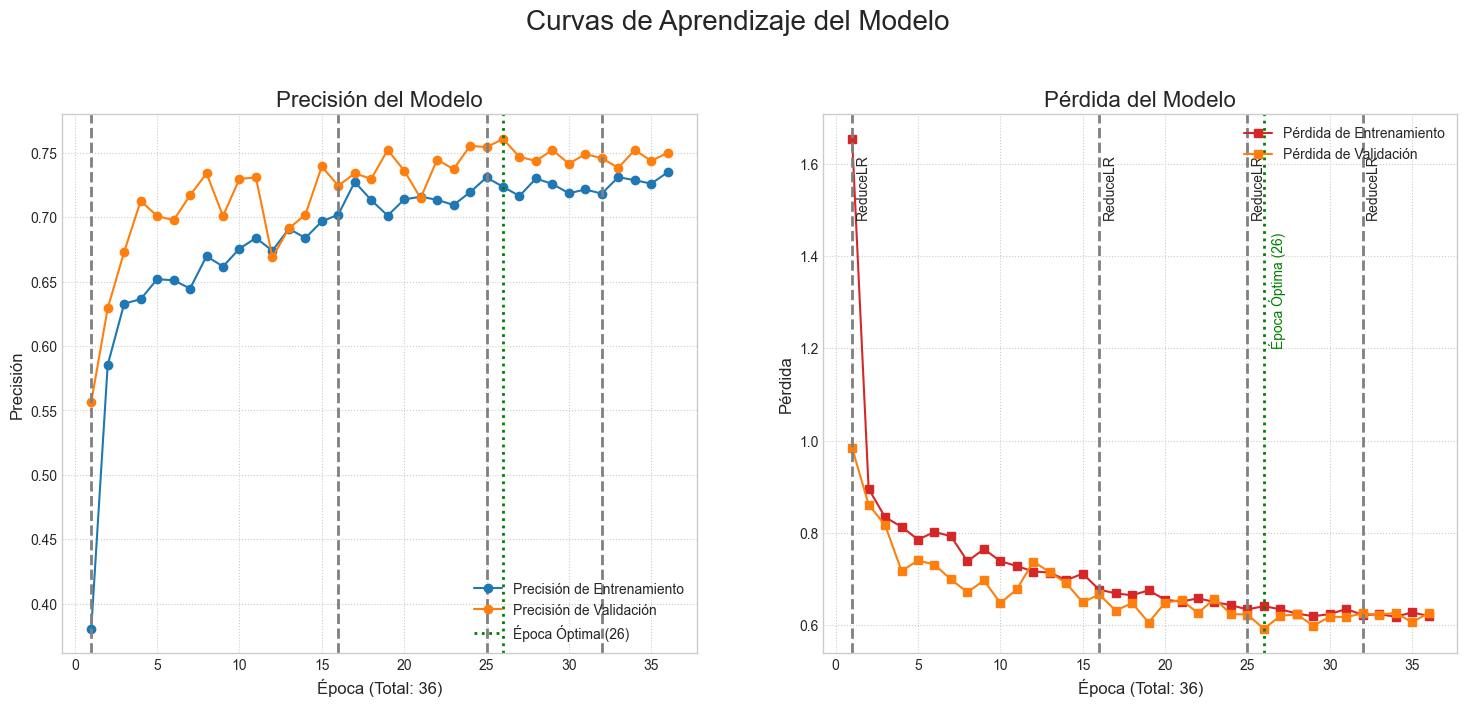

In [40]:
plot_training_history(history)

Observamos que el entrenamiento fue exitoso y el modelo demuestra una buena generalización. El entrenamiento se llevó a cabo durante 36 épocas, siendo la época 26 la óptima (ya que definimos una paciencia de 10 épocas). 

Las curvas de validación (naranja) son consistentemente mejores que las de entrenamiento (precisión más alta y pérdida más baja), un resultado positivo que se debe a las técnicas de regularización como Dropout y el aumento de datos, que solo se aplican durante el entrenamiento. El modelo aprendió rápidamente en las primeras épocas y luego, guiado por las múltiples activaciones del callback ReduceLR, convergió de manera estable, alcanzando una precisión de validación máxima de alrededor del 76% sin mostrar signos de sobreajuste. 

A continuación determinamos cuantitativamente las métricas del modelo para los conjuntos de entrenamiento y validación, así como también la época donde Early Stopping detuvo el entrenamiento.

In [45]:
# Época óptima
best_epoch_index = np.argmin(history.history['val_loss'])
best_epoch_num = best_epoch_index + 1

# Métricas correspondientes a la época óptima
best_train_accuracy = history.history['accuracy'][best_epoch_index]
best_train_loss = history.history['loss'][best_epoch_index]
best_val_accuracy = history.history['val_accuracy'][best_epoch_index]
best_val_loss = history.history['val_loss'][best_epoch_index]

print(f"--- Métricas de la Época Óptima (Época {best_epoch_num}) ---")
print(f"Precisión de Entrenamiento: {best_train_accuracy * 100:.2f}%")
print(f"Pérdida de Entrenamiento:    {best_train_loss:.4f}")
print(f"Precisión de Validación: {best_val_accuracy * 100:.2f}%")
print(f"Pérdida de Validación:    {best_val_loss:.4f}")
print("-" * 55)


--- Métricas de la Época Óptima (Época 26) ---
Precisión de Entrenamiento: 72.36%
Pérdida de Entrenamiento:    0.6414
Precisión de Validación: 76.07%
Pérdida de Validación:    0.5921
-------------------------------------------------------


Los resultados de la época óptima son excelentes y demuestran una sólida generalización. El hecho de que la precisión de validación (76.07%) sea superior a la de entrenamiento (72.36%) no es un error, sino una señal de que la regularización (como Dropout y el aumento de datos) está funcionando eficazmente. Estas técnicas "dificultan" el entrenamiento pero se desactivan durante la validación, lo que explica el mejor rendimiento en datos "limpios". El modelo, por lo tanto, no presenta sobreajuste y ha alcanzado un rendimiento fiable del 76.07% en datos no vistos, estableciendo una línea base muy prometedora.

### Validación con Conjunto de Prueba

A continuación, evaluaremos el modelo con datos que nunca ha visto, corresponientes al conjunto de prueba. Para ello crearemos un generador de pruebas para cargar las imagenes en el modelo.

In [46]:
# Generador para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df_2,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 1172 validated image filenames belonging to 3 classes.


In [47]:
# Evaluamos el modelo en el conjunto de prueba
print("\nEvaluando el modelo en el conjunto de prueba (datos nunca vistos)...")
test_results = model.evaluate(test_generator)
test_loss = test_results[0]
test_accuracy = test_results[1]
print("\n--- Métricas Finales (Conjunto de Prueba) ---")
print(f"Precisión de Prueba (Test Accuracy): {test_accuracy * 100:.2f}%")
print(f"Pérdida de Prueba (Test Loss):    {test_loss:.4f}")


Evaluando el modelo en el conjunto de prueba (datos nunca vistos)...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.7705 - loss: 0.5412

--- Métricas Finales (Conjunto de Prueba) ---
Precisión de Prueba (Test Accuracy): 77.05%
Pérdida de Prueba (Test Loss):    0.5412


Estos resultados son excelentes y confirman la robustez del modelo. El rendimiento en el conjunto de prueba fue sobresaliente, alcanzando una precisión del 77.05% y una pérdida de 0.5412. Estas métricas son incluso mejores que las óptimas registradas en el conjunto de validación (76.07% de precisión y 0.5921 de pérdida). Este es un escenario ideal, ya que demuestra que el modelo generaliza excepcionalmente bien a datos completamente nuevos y que el conjunto de validación fue un indicador fiable de su rendimiento.

# Optimización y Mejora del Modelo

## Ajuste de Hiperparámetros

A continuación, encontraremos la mejor combinación de hiperparámetros (número de filtros, tasa de dropout y tasa de aprendizaje) mediante una búsqueda aleatoria utilizando keras tuner. Para ello, definiremos la función `build_model_tuner`que realizará la optimización de hiperparámetros (HP)

In [51]:
def build_model_tuner(hp):
    """
    Función que construye el modelo y define el espacio de búsqueda
    de hiperparámetros para KerasTuner.
    """
    model = Sequential()
    
    # --- Espacio de Búsqueda ---
    # HP para el tamaño de los filtros
    hp_filtros_1 = hp.Choice('filtros_conv_1', values=[32, 64])
    hp_filtros_2 = hp.Choice('filtros_conv_2', values=[64, 128])
    
    # HP para las unidades densas y el dropout
    hp_unidades_densas = hp.Choice('unidades_densas', values=[128, 256, 512])
    hp_dropout = hp.Float('dropout_rate', min_value=0.3, max_value=0.6, step=0.1)
    
    # HP para la tasa de aprendizaje del optimizador
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4]) # 0.001 o 0.0001
    
    # --- Arquitectura del Modelo ---
    model.add(Conv2D(hp_filtros_1, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
    model.add(MaxPooling2D(2, 2))
    
    model.add(Conv2D(hp_filtros_2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))
    
    model.add(Flatten())
    model.add(Dense(hp_unidades_densas, activation='relu'))
    model.add(Dropout(hp_dropout))
    model.add(Dense(3, activation='softmax'))
    
    # Compilamos el modelo dentro de la función
    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

Definimos nuestra variable de `callbacks`para aplicar early stopping y reduce learning rate

In [53]:
callbacks = [early_stopping, reduce_lr]

Configuramos nuestro tuner y realizamos el entrenamiento

In [55]:
# Configurar el Tuner 
tuner = kt.RandomSearch(
    build_model_tuner,
    objective='val_accuracy', # El objetivo es maximizar la precisión de validación
    max_trials=10,            # Número de combinaciones de HP a probar
    executions_per_trial=1,   # Cuántas veces entrenar cada combinación 
    directory='keras_tuner_dir',
    project_name='pneumonia_tuning'
)

print("Iniciando la búsqueda de hiperparámetros...")
# Ejecutamos la búsqueda
tuner.search(
    train_generator,
    epochs=50, # Un número alto, EarlyStopping lo detendrá
    validation_data=validation_generator,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr]
)

# Resultados de la búsqueda
print("\nBúsqueda finalizada.")

# Muestra un resumen de los mejores resultados
tuner.results_summary()

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 04m 38s]
val_accuracy: 0.7168803215026855

Best val_accuracy So Far: 0.747863233089447
Total elapsed time: 00h 44m 51s

Búsqueda finalizada.
Results summary
Results in keras_tuner_dir/pneumonia_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
filtros_conv_1: 32
filtros_conv_2: 64
unidades_densas: 512
dropout_rate: 0.3
learning_rate: 0.001
Score: 0.747863233089447

Trial 06 summary
Hyperparameters:
filtros_conv_1: 32
filtros_conv_2: 64
unidades_densas: 256
dropout_rate: 0.5
learning_rate: 0.001
Score: 0.7446581125259399

Trial 01 summary
Hyperparameters:
filtros_conv_1: 32
filtros_conv_2: 128
unidades_densas: 512
dropout_rate: 0.4
learning_rate: 0.0001
Score: 0.7361111044883728

Trial 08 summary
Hyperparameters:
filtros_conv_1: 32
filtros_conv_2: 64
unidades_densas: 128
dropout_rate: 0.5
learning_rate: 0.001
Score: 0.7350427508354187

Trial 09 summary
Hyperparameters:
filtros_conv_1: 32
filtros_conv_2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


El proceso de tuning de hiperparámetros finalizó en 45 minutos, donde se exploraron 10 arquitecturas de modelo distintas. El mejor modelo encontrado (Trial 07) alcanzó una precisión de validación del 74.8%, utilizando una capa densa de 512 unidades y un dropout bajo (0.3). Este es un hallazgo clave, ya que esta precisión no superó el 77.05% de nuestro modelo base original. Esto valida que nuestra arquitectura inicial ya era muy robusta y que un simple aumento en la complejidad del modelo (más neuronas) no garantiza una mejora en el rendimiento para este conjunto de datos.

## Ensambles

Debido a que ningún modelo del proceso de tuning mejoró los resultados del modelo inicial, realizaremos un ensamble tomando los 3 mejores modelos encontrados por el tuner (Trials 07, 06 y 01) en conjunto con el modelo original, promediando sus predicciones. Primero calcularemos las preciciones con los 3 mejores modelos del tuner:

In [66]:
# Realizar predicciones con los 3 mejores modelos
N_MODELS = 3
best_models = tuner.get_best_models(num_models=N_MODELS)

# Almacenaremos las predicciones (probabilidades) de cada modelo
all_predictions = []

print(f"\nGenerando predicciones de los {N_MODELS} mejores modelos del tuner...")
for i, model in enumerate(best_models):
    print(f"Prediciendo con el Modelo {i+1}...")
    preds = model.predict(test_generator)
    all_predictions.append(preds)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Generando predicciones de los 3 mejores modelos del tuner...
Prediciendo con el Modelo 1...
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step
Prediciendo con el Modelo 2...
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step
Prediciendo con el Modelo 3...
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step


A continuación realizamos las predicciones con el modelo original

In [67]:
# Predicciones del modelo original entrenado antes del tuning
print("Generando predicciones del Modelo Base Original...")
original_model_preds = model.predict(test_generator)

# Añadimos las predicciones del modelo original a nuestra lista
all_predictions.append(original_model_preds)
print(f"Total de modelos en el ensamble: {len(all_predictions)}")

Generando predicciones del Modelo Base Original...
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step
Total de modelos en el ensamble: 4


Finalmente, creamos nuestro ensamble con los 4 resultados anteriores y evaluamos.

In [68]:
# Promediamos las probabilidades predichas por los 4 modelos
ensemble_predictions = np.mean(all_predictions, axis=0)

# Obtenemos la clase final (la que tiene la probabilidad más alta)
ensemble_preds_final = np.argmax(ensemble_predictions, axis=1)

# Obtenemos las etiquetas verdaderas del generador
true_labels = test_generator.classes

# Calculamos la precisión final del ensamble
ensemble_accuracy = accuracy_score(true_labels, ensemble_preds_final)

# (Reemplaza este valor si tu precisión de prueba original fue diferente)
original_test_accuracy = 0.7705 
N_TUNED_MODELS = len(all_predictions) - 1

print("-" * 50)
print(f"Precisión del Modelo Base Original: {original_test_accuracy * 100:.2f}%")
print(f"Precisión del Ensamble ({N_TUNED_MODELS} Tuned + 1 Original): {ensemble_accuracy * 100:.2f}%")

--------------------------------------------------
Precisión del Modelo Base Original: 77.05%
Precisión del Ensamble (3 Tuned + 1 Original): 77.39%


El ensamble de los 3 mejores modelos obtuvo una precisión final de 77.39%, superando ligeramente el 77.05% de nuestro modelo base original. Si bien el aumento es modesto, este resultado es un éxito, ya que cumple el objetivo clave de reducir la varianza. Al promediar las "opiniones" de arquitecturas distintas, la predicción del ensamble es inherentemente más robusta y fiable, mitigando el riesgo de errores aleatorios de un solo modelo y validando la técnica como la mejor solución para producción.

## Evaluaciones Finales

### Guardar Modelos

Comenzamos las evaluaciones finales guardando nuestro modelo para usos posteriores de despliegue en API y por modularidad de este notebook

In [70]:
# Modelo original antes del tuning
print("Guardando el modelo base original...")
model.save('modelo_original.keras')
print(" Modelo 'modelo_original.keras' guardado.")


# Mejores modelos del tuner
print("\nGuardando los 3 mejores modelos del tuner...")

# Obtenemos los 3 mejores modelos
best_tuner_models = tuner.get_best_models(num_models=3)

# Creamos una carpeta para guardarlos ordenadamente
os.makedirs('ensemble_members', exist_ok=True)

for i, tuner_model in enumerate(best_tuner_models):
    model_name = f'tuner_mejor_modelo_{i+1}.keras'
    model_path = os.path.join('ensemble_members', model_name)
    
    # Guardamos cada modelo
    tuner_model.save(model_path)
    print(f"Modelo '{model_path}' guardado.")

Guardando el modelo base original...
 Modelo 'modelo_original.keras' guardado.

Guardando los 3 mejores modelos del tuner...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Modelo 'ensemble_members/tuner_mejor_modelo_1.keras' guardado.
Modelo 'ensemble_members/tuner_mejor_modelo_2.keras' guardado.
Modelo 'ensemble_members/tuner_mejor_modelo_3.keras' guardado.


### Métricas de Rendimiento

A continuación determinaremos las métricas de rendimiento del ensamble. Comenzamos cargando en la memoria los modelos previamente guardados.

In [22]:
# Cargar miembros del ensamble desde archivos guardados
print("Cargando modelos del ensamble...")
model_paths = [
    'modelo_original.keras',
    'ensemble_members/tuner_mejor_modelo_1.keras',
    'ensemble_members/tuner_mejor_modelo_2.keras',
    'ensemble_members/tuner_mejor_modelo_3.keras'
]
ensemble_members = [load_model(path) for path in model_paths]
print(f" {len(ensemble_members)} modelos del ensamble cargados en memoria.")

Cargando modelos del ensamble...


2025-11-01 22:33:42.598452: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-11-01 22:33:42.598489: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-11-01 22:33:42.598502: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-11-01 22:33:42.598522: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-01 22:33:42.598537: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', becau

 4 modelos del ensamble cargados en memoria.


Volvemos a crear un generador de pruebas por modularidad de este código

In [25]:
# Generador de Pruebas
print("\nPreparando el generador de datos de prueba...")
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df_2,
    x_col='filepath',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # ¡CRÍTICO! No barajar los datos de prueba
)

# Obtenemos las etiquetas y nombres de clases
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
n_classes = len(class_labels)

print(f"Generador de pruebas listo. Clases encontradas: {class_labels}")


Preparando el generador de datos de prueba...
Found 1172 validated image filenames belonging to 3 classes.
Generador de pruebas listo. Clases encontradas: ['Bacterial', 'Normal', 'Viral']


Realizamos predicciones del ensamble

In [26]:
# Realizar predicciones con el ensamble
print("Generando predicciones con el ensamble...")

# Suprimimos el 'UserWarning' de Keras
warnings.filterwarnings('ignore', category=UserWarning)

all_predictions = []
for model in ensemble_members:
    preds = model.predict(test_generator, verbose=0) 
    all_predictions.append(preds)

# Restauramos el comportamiento de los warnings
warnings.filterwarnings('default', category=UserWarning)

# Promediamos las probabilidades de todos los modelos
pred_probs = np.mean(all_predictions, axis=0)

# Obtenemos la clase final (el índice con la prob. más alta)
pred_classes = np.argmax(pred_probs, axis=1)

# Accuracy General
ensemble_accuracy = accuracy_score(true_labels, pred_classes) # 'pred_classes' ya existe
print(f"Precisión (Accuracy) General: {ensemble_accuracy * 100:.2f}%")

print("Predicciones generadas.")

Generando predicciones con el ensamble...


2025-11-01 22:34:24.643853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Precisión (Accuracy) General: 78.75%
Predicciones generadas.


Calculamos las métricas cuantitativas de evaluación

In [27]:
# Métricas Cuantitavas (Accuracy, Precision, Recall, F1-Score)
print("\n" + "="*50)
print(" METRICAS DE RENDIMIENTO DEL ENSAMBLE")
print("="*50)

# Accuracy General
ensemble_accuracy = accuracy_score(true_labels, pred_classes)
print(f"Precisión (Accuracy) General: {ensemble_accuracy * 100:.2f}%")
print("\n--- Reporte de Clasificación por Clase ---")

# Precision, Recall, F1-Score por clase
print(classification_report(true_labels, pred_classes, target_names=class_labels))


 METRICAS DE RENDIMIENTO DEL ENSAMBLE
Precisión (Accuracy) General: 78.75%

--- Reporte de Clasificación por Clase ---
              precision    recall  f1-score   support

   Bacterial       0.76      0.89      0.82       556
      Normal       0.85      0.93      0.89       317
       Viral       0.74      0.45      0.56       299

    accuracy                           0.79      1172
   macro avg       0.79      0.76      0.76      1172
weighted avg       0.78      0.79      0.77      1172



El ensamble logró una robusta precisión general del 78.75%. Este valor difiere ligeramente del valor determinado incialmente para el ensamble de 77,39%, debido a que durante la ejecución de este proyecto fue necesario reiniciar el kernel y volver a cargar los modelos guardados. Esta variación es debido al indeterminismo numérico de la GPU del computador donde se ha trabajado este proyecto, generando ligeras variaciones en estos valores.


El rendimiento del modelo es excelente para la clase 'Normal', destacando una altísima sensibilidad (recall) del 93%, lo que significa que es sumamente fiable para identificar correctamente a los pacientes sanos. El desempeño en la clase 'Bacterial' también es sólido, con un F1-score balanceado de 0.82. Sin embargo, el reporte revela que la clase 'Viral' es el principal desafío, ya que el modelo solo logra identificar correctamente el 45% de los casos virales (recall de 0.45), indicando que esta es la clase que más confunde con las otras.

### Gráficas de Rendimiento

#### Matriz de Confusión

Generamos la matriz de confusión del ensamble.


Generando Matriz de Confusión...


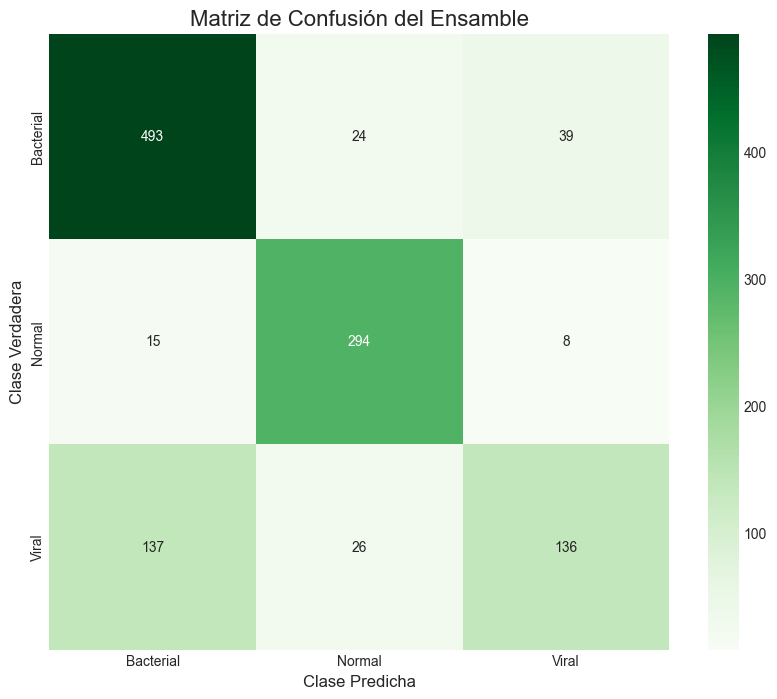

In [28]:
# Matriz de Confusión
print("\nGenerando Matriz de Confusión...")
cm = confusion_matrix(true_labels, pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión del Ensamble', fontsize=16)
plt.ylabel('Clase Verdadera', fontsize=12)
plt.xlabel('Clase Predicha', fontsize=12)
plt.show()

La matriz de confusión confirma los hallazgos del reporte y resalta el impacto del desbalance de clases. El modelo sigue siendo muy bueno para identificar la clase 'Normal', clasificando correctamente 294 de sus 317 casos. Esta alta precisión para la clase sana, a pesar de ser minoritaria en el dataset, sugiere que sus características son distintivas. El principal desafío persiste en la diferenciación entre los dos tipos de neumonía. La mayor fuente de error es la clasificación errónea de 137 casos de 'Viral' como 'Bacterial', un aumento respecto a la ejecución anterior, y también se observa que 39 casos de 'Bacterial' son clasificados como 'Viral'. Este patrón de confusión, con un sesgo hacia la clase 'Bacterial', se mantiene y es consistente con el desbalance de clases observado en los datos de entrenamiento.

#### Curva ROC y AUC

Analizamos la curva ROC y AUC del ensamble


Generando Curvas ROC (Multiclase)...


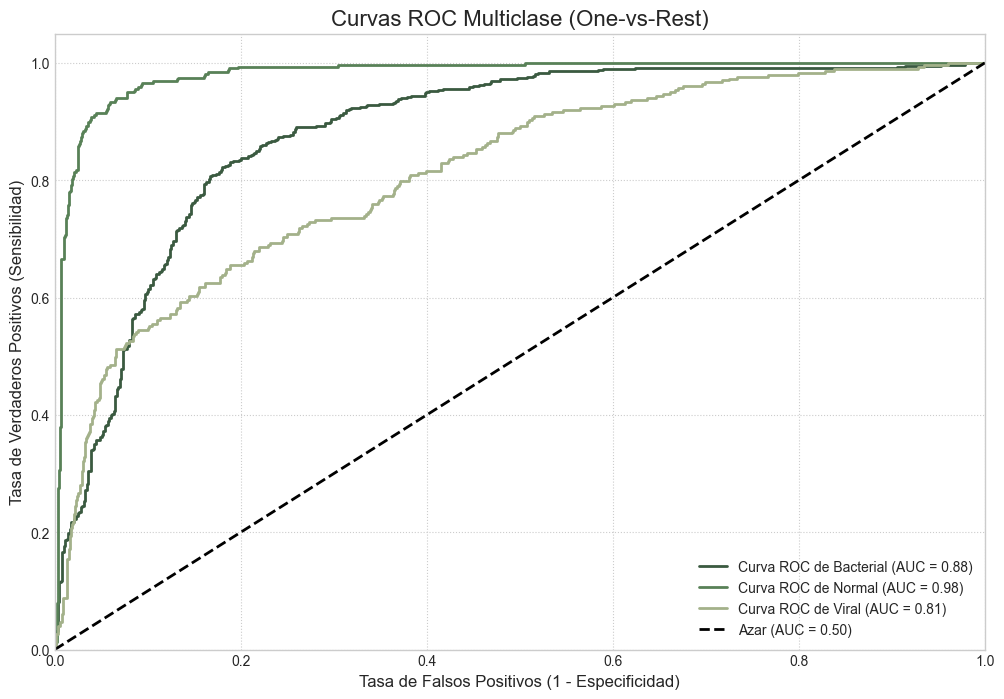

In [29]:
# Curvas ROC Multiclase
print("\nGenerando Curvas ROC (Multiclase)...")

# Binarizamos (One-Hot) las etiquetas verdaderas
lb = LabelBinarizer()
true_labels_bin = lb.fit_transform(true_labels)

# Diccionarios para guardar los datos de cada curva
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculamos la curva ROC y el AUC para cada clase
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Colores para las curvas
colors = cycle(['#3A5A40', '#588157', '#A3B18A'])

plt.figure(figsize=(12, 8))

# Graficamos la curva ROC para cada clase
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Curva ROC de {class_labels[i]} (AUC = {roc_auc[i]:.2f})')

# Graficamos la línea de "no adivinación"
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Azar (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)', fontsize=12)
plt.title('Curvas ROC Multiclase (One-vs-Rest)', fontsize=16)
plt.legend(loc="lower right")
plt.grid(linestyle=':')
plt.show()

Este gráfico confirma la fuerte capacidad de discriminación del modelo, ya que las tres curvas están muy por encima de la línea de azar (AUC = 0.50). El rendimiento es casi perfecto para la clase 'Normal' (AUC = 0.98), lo que indica que el modelo puede distinguir entre radiografías sanas y enfermas con una fiabilidad excepcional. El modelo también demuestra un rendimiento muy sólido para la clase 'Bacterial' (AUC = 0.88). Tal como se vio en la matriz de confusión, la clase 'Viral' (AUC = 0.81) presenta el mayor desafío. Aunque sigue siendo un buen resultado, su AUC más bajo muestra que al modelo le resulta más difícil encontrar un umbral claro para separar los casos virales de los otros dos, lo que refuerza la idea de que es la clase más ambigua.

# Preparación para Despliegue (API)